# End-of-life cells data parser

Author: Roger Ho
10/23/21

This notebook aims to load, parse, and graph data from end-of-life cells

In [11]:
# switch to data directory
import os, sys, yaml

# if os.path.basename(os.getcwd()) == 'notebooks':
#     os.chdir('../../data/2021-08-post-mortem-biologic-pc')

# configure paths
if os.path.basename(os.getcwd()) == 'rho':
    print('changing path...')
    os.chdir('../../../')
    sys.path.insert(0, './src/')
    paths = yaml.load(open('paths.yaml', 'r'), Loader=yaml.FullLoader)
    # chdir to data
    os.chdir(paths['data'] + '2021-08-post-mortem-biologic-pc')

elif os.path.basename(os.getcwd()) == '2021-08-post-mortem-biologic-pc':
    pass # already there

filter out coin cell raw output data with regex

In [12]:
import re

# exclude files containing 'coin', 'hppc', and include only .txt files
regex = re.compile("^((?!coin).)*(txt)$") # add hppc.txt tests

# re.compile("^((?!coin).)*(txt)$") includes 
# re.compile("^((?!coin).)*(txt)$")
eof_cells = [file for file in os.listdir() if regex.match(file)]

print(eof_cells)

['20210708_capacity_diagnostic_1c_CA2.txt', '20210708_capacity_diagnostic_1c_CA3.txt', '20210708_capacity_diagnostic_1c_CA1.txt', '20210708_capacity_diagnostic_1c_CA5.txt', '20210708_capacity_diagnostic_1c_CA7.txt', '20210708_capacity_diagnostic_1c_CA6.txt', '20210712_hppc_eis_CA1.txt', '20210708_capacity_diagnostic_c20_CA5.txt', '20210712_hppc_eis_CA2.txt', '20210708_capacity_diagnostic_c20_CA6.txt', '20210708_capacity_diagnostic_c20_CA7.txt', '20210712_hppc_eis_CA3.txt', '20210712_hppc_eis_CA7.txt', '20210708_capacity_diagnostic_c20_CA3.txt', '20210708_capacity_diagnostic_c20_CA2.txt', '20210712_hppc_eis_CA6.txt', '20210708_capacity_diagnostic_c20_CA1.txt', '20210712_hppc_eis_CA5.txt', '20210712_hppc_eis_CA8.txt', '20210708_capacity_diagnostic_c20_CA8.txt', '20210708_capacity_diagnostic_1c_CA8.txt']


extract header data from each test

In [13]:
import pandas as pd

test_data = list()

for file in eof_cells:
    with open(file, 'rb') as f:
        lines = f.readlines()
        test_entry = dict(channel="", name="", date="", headerlines=0, df=pd.DataFrame())
        test_entry["channel"] = lines[5].decode('ASCII')[17:-12]
        test_entry["name"] = file
        test_entry["date"] = lines[14].decode('ASCII')[25:-2]
        test_entry["headerlines"] = int(lines[1].decode('ASCII').split()[-1])
        
        test_data.append(test_entry)

consolidating data with pandas

In [14]:
# match data with corresponding test entry
for test in test_data:
    test["df"] = pd.read_csv(test["name"], skiprows=test["headerlines"]-1, encoding="ISO-8859-1", sep='\t')

    # print("channel: ", test["channel"], " date run: ", test["date"])

plot data with matplotlib

/var/folders/tv/tzwlbfrd1pgfz8c00_by_3y00000gn/T/ipykernel_82506/173945023.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(counter)


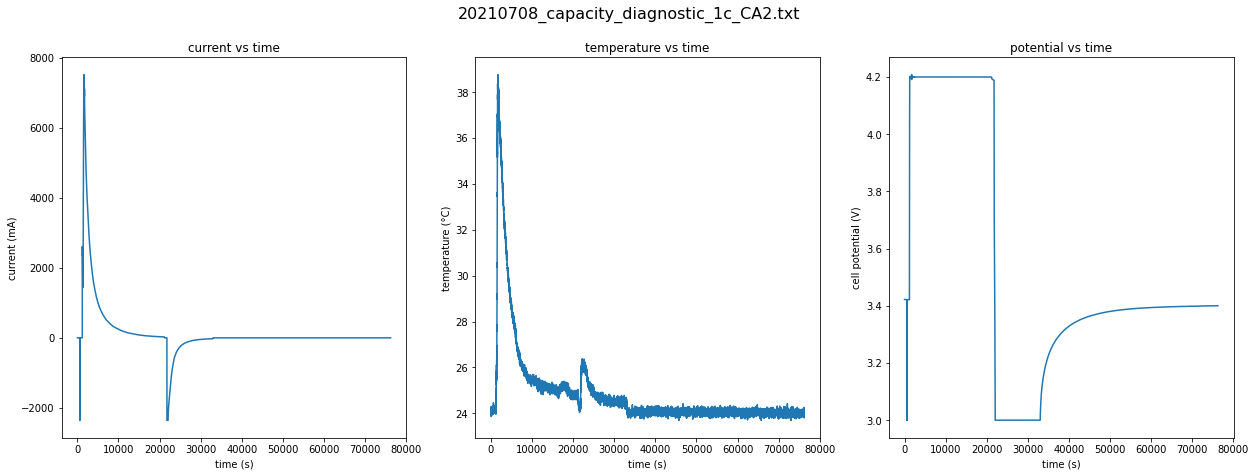

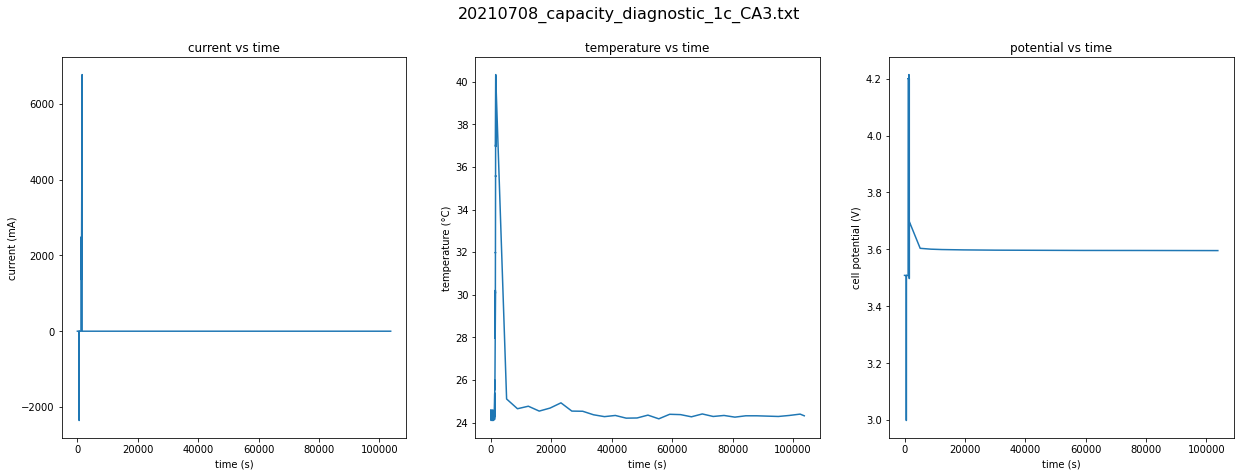

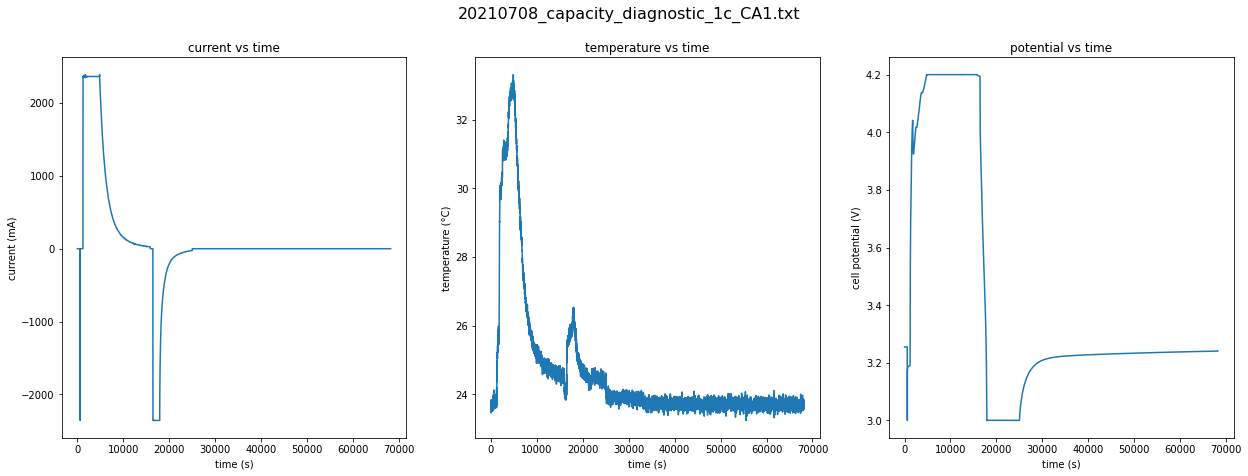

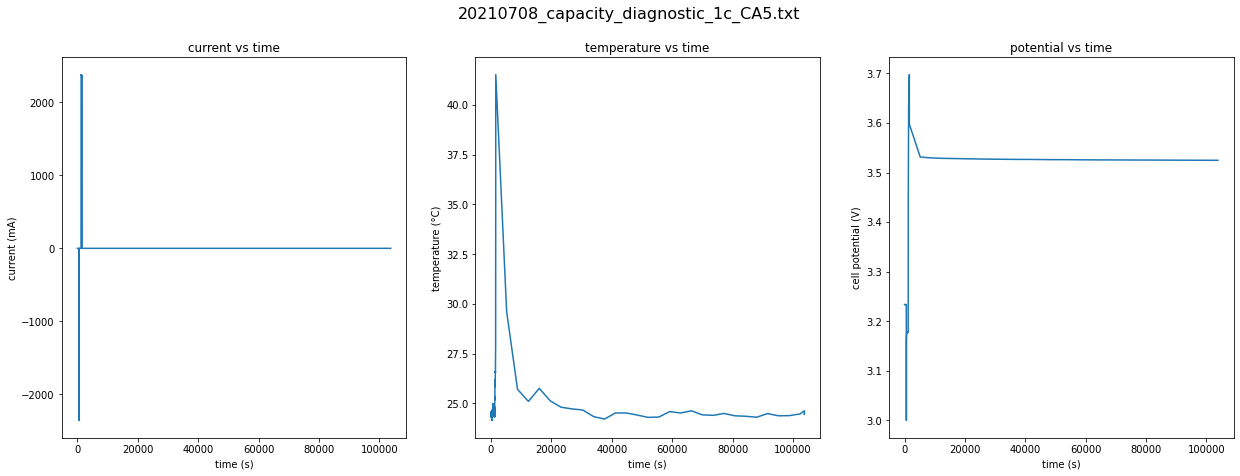

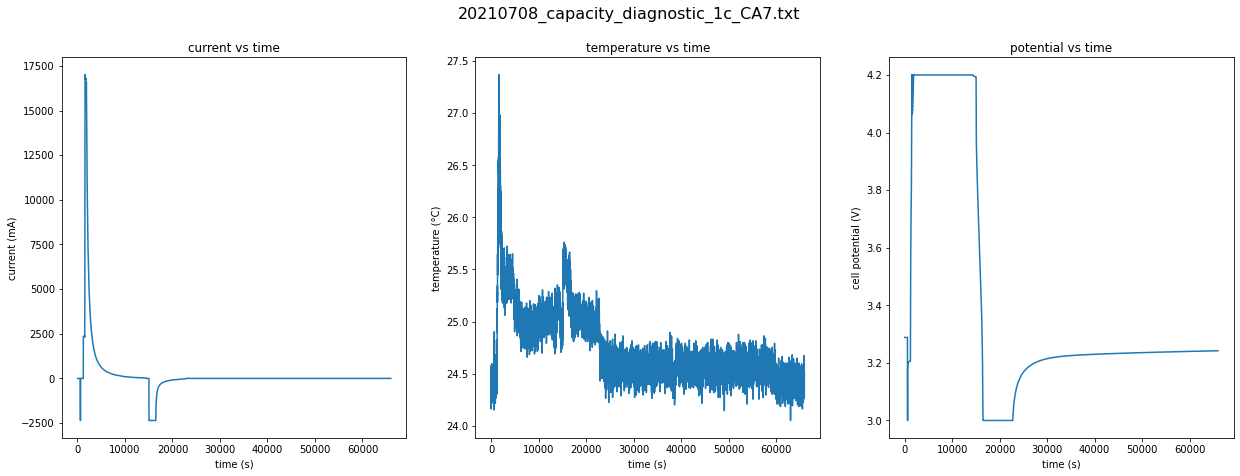

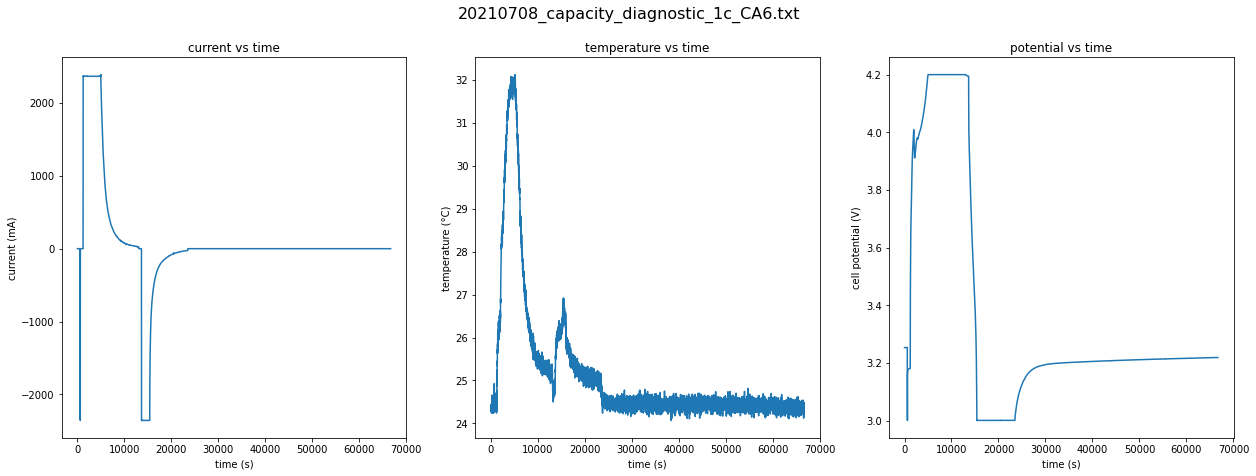

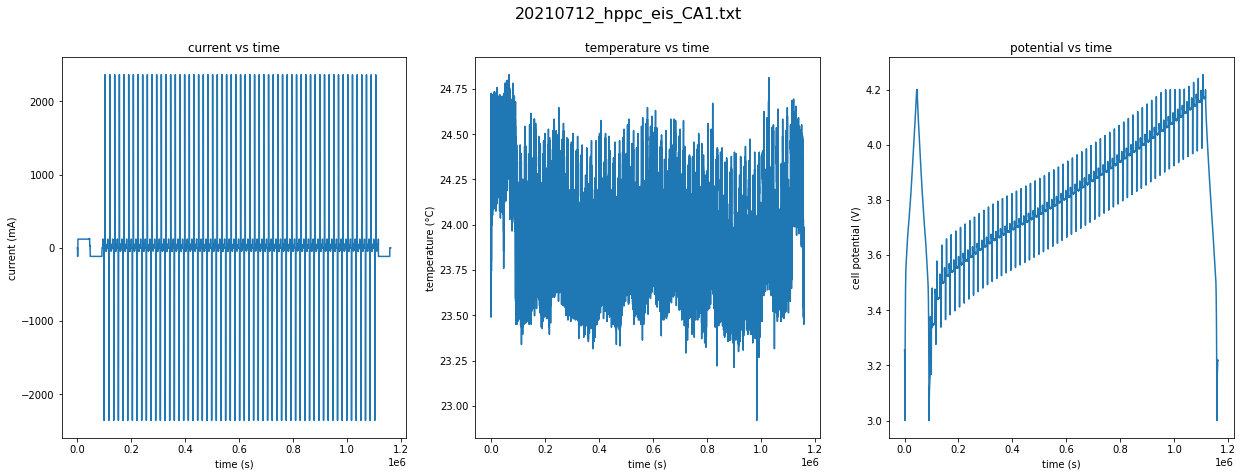

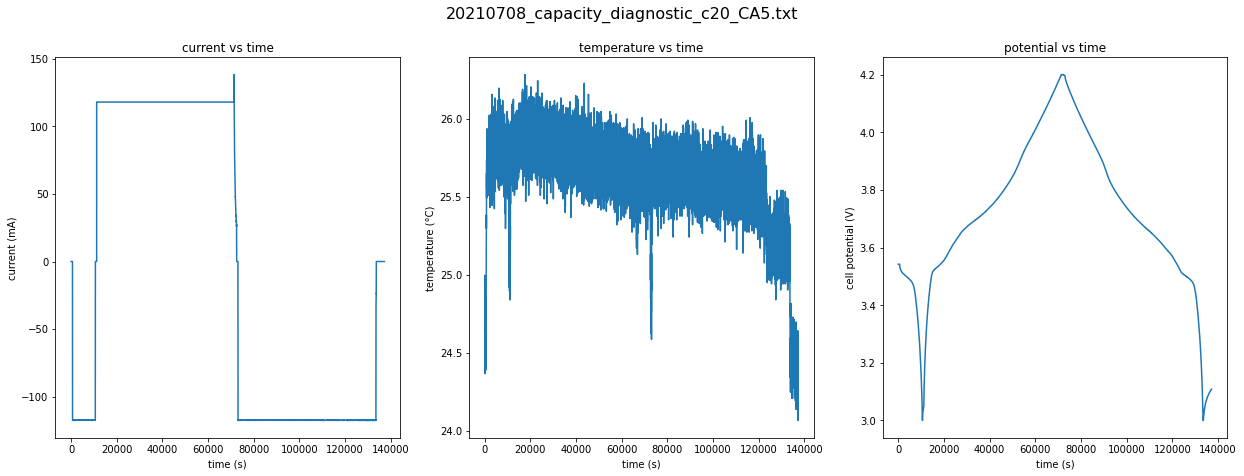

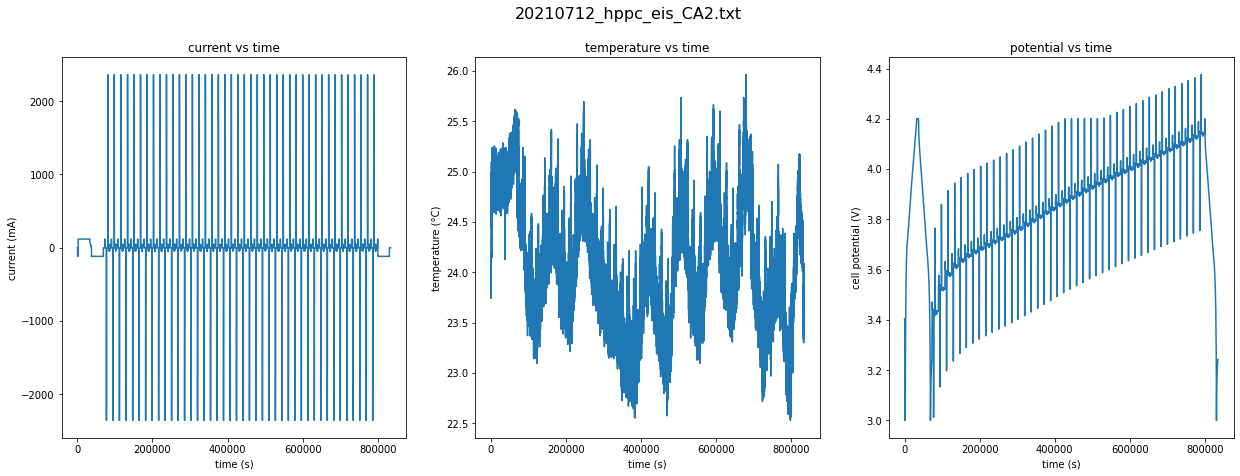

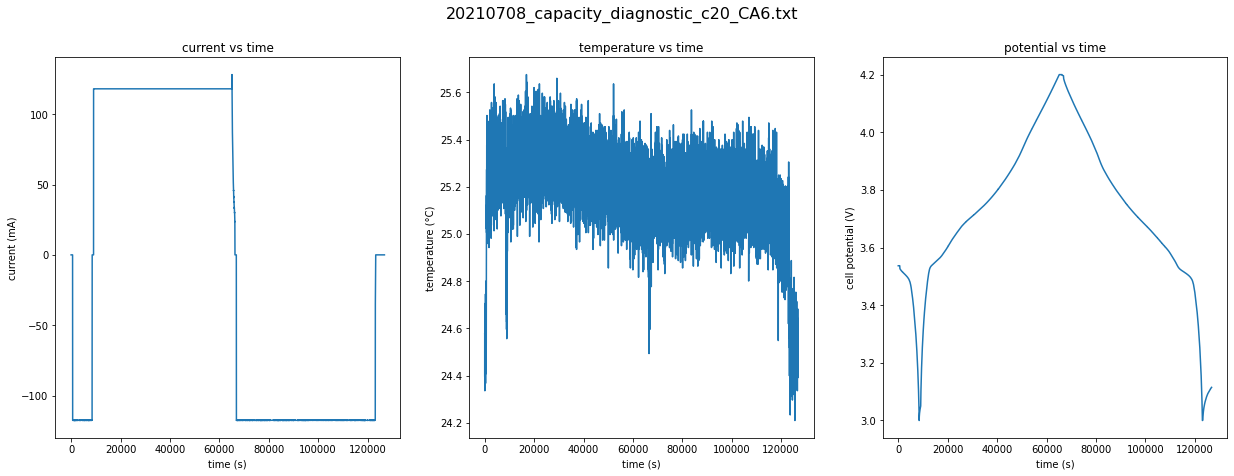

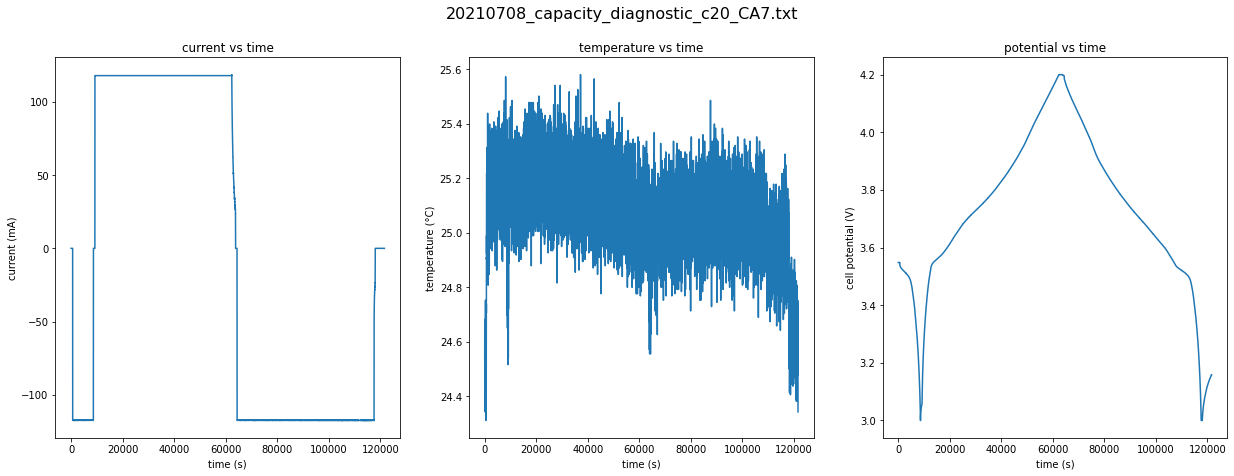

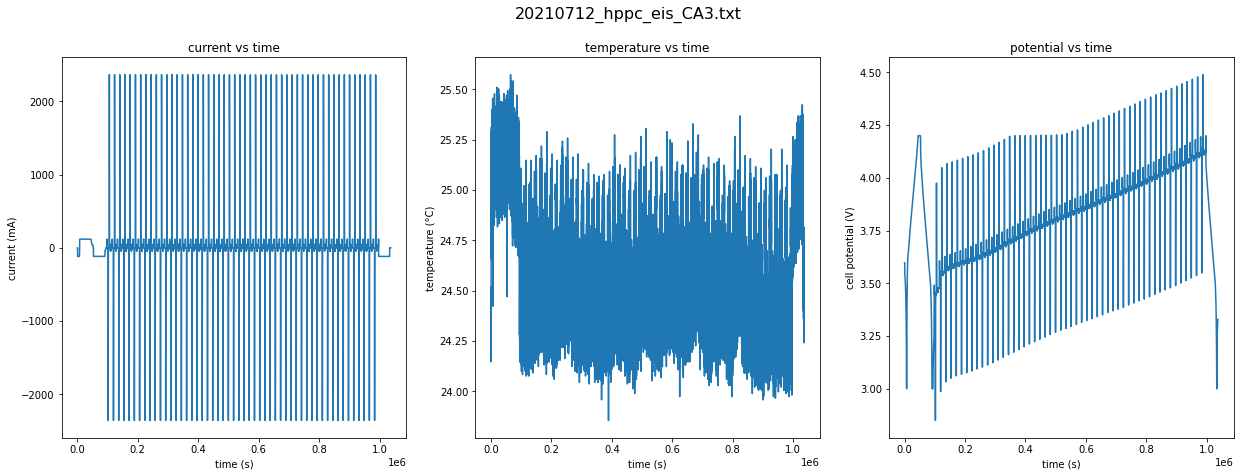

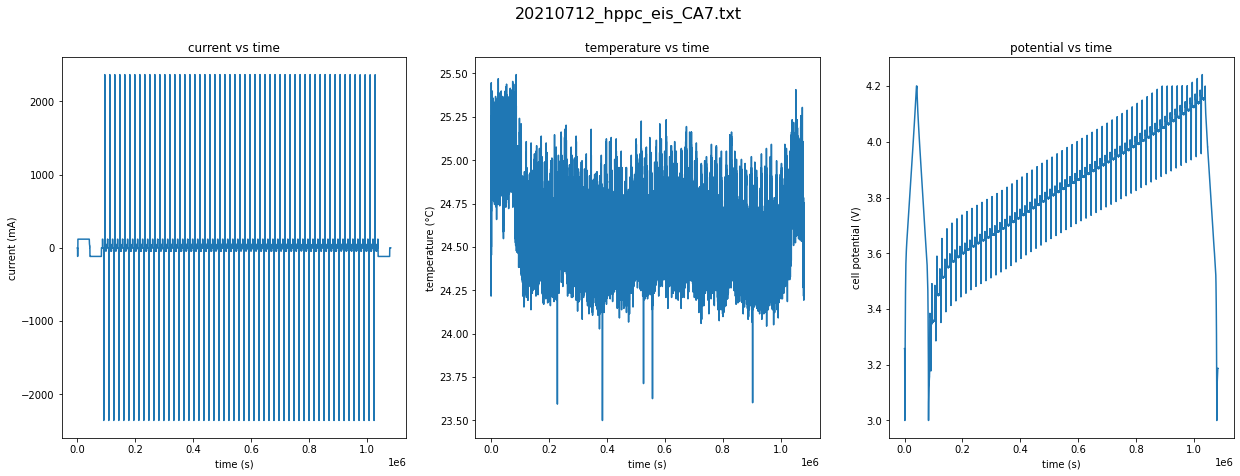

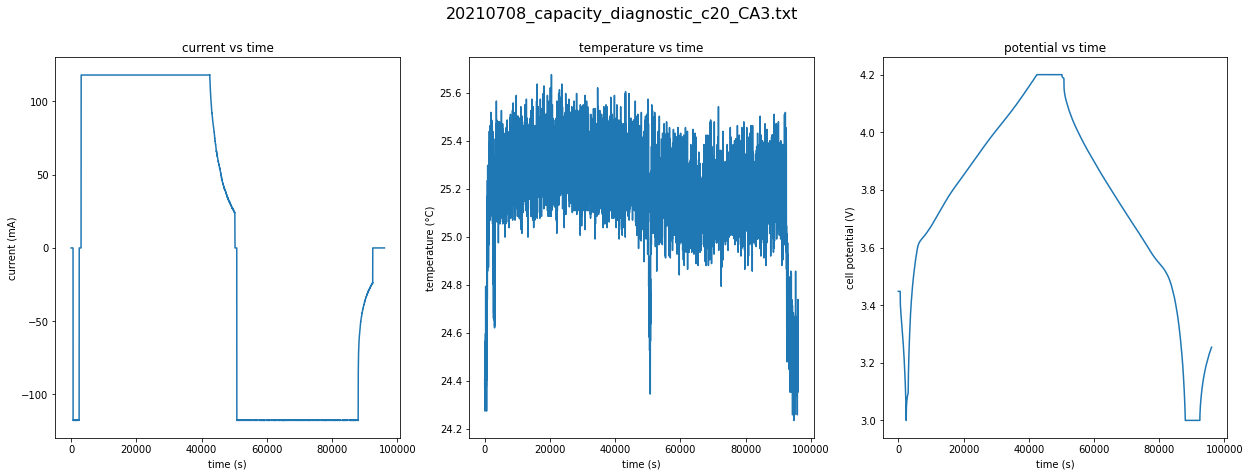

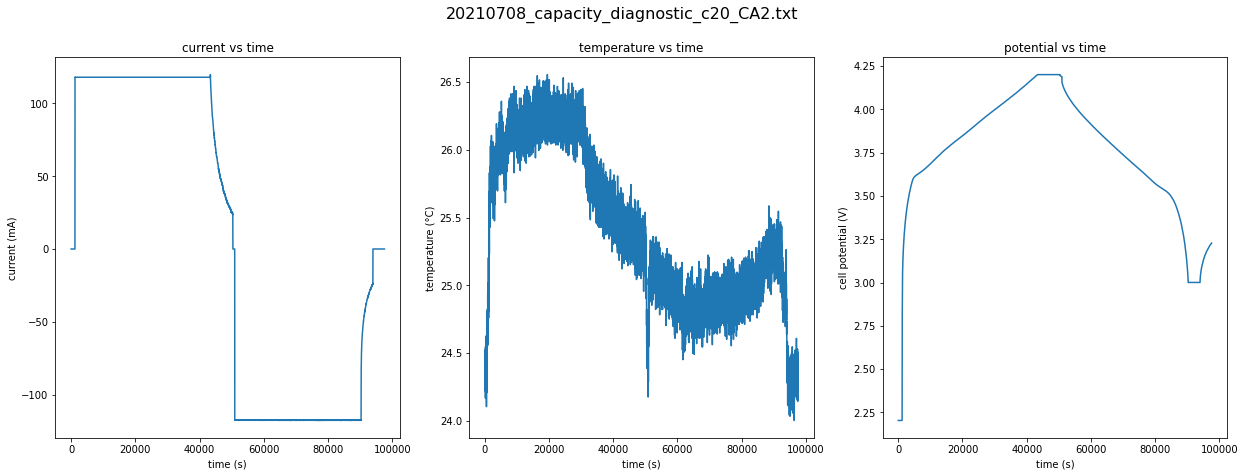

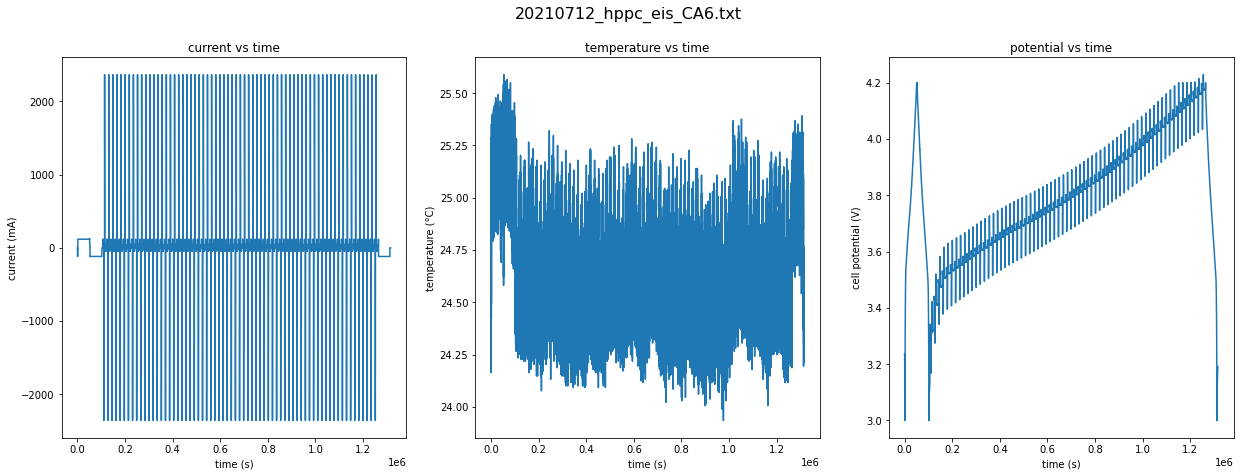

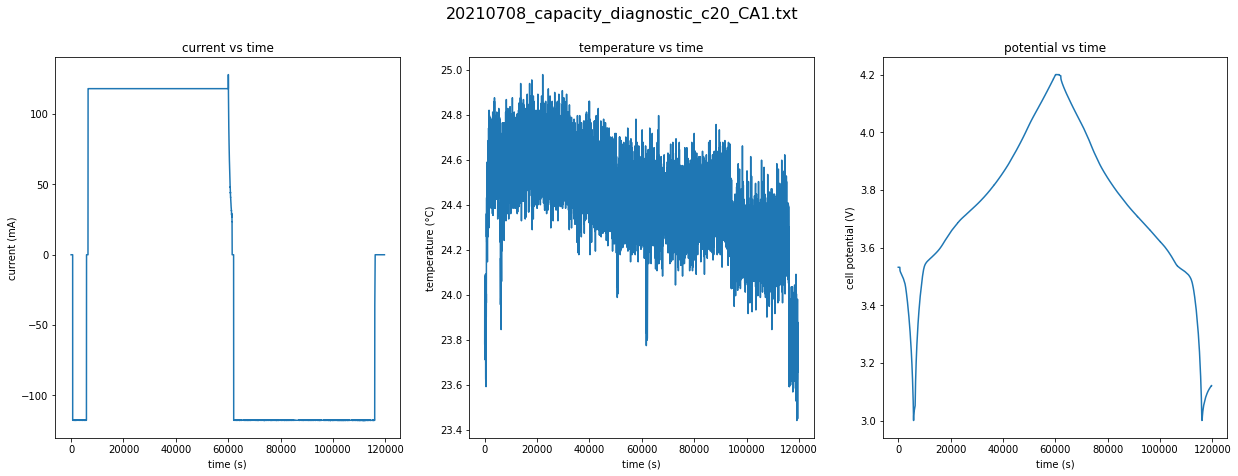

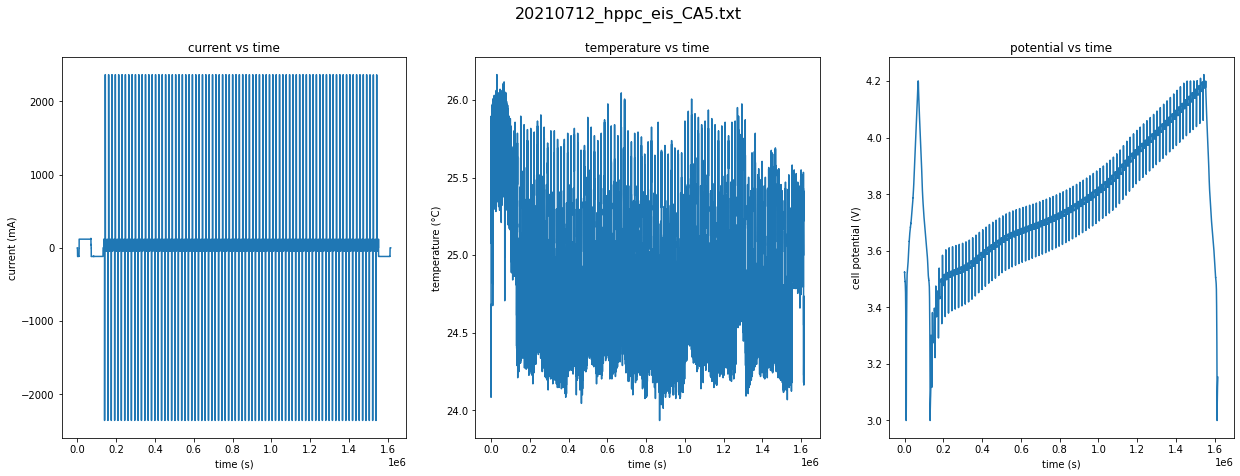

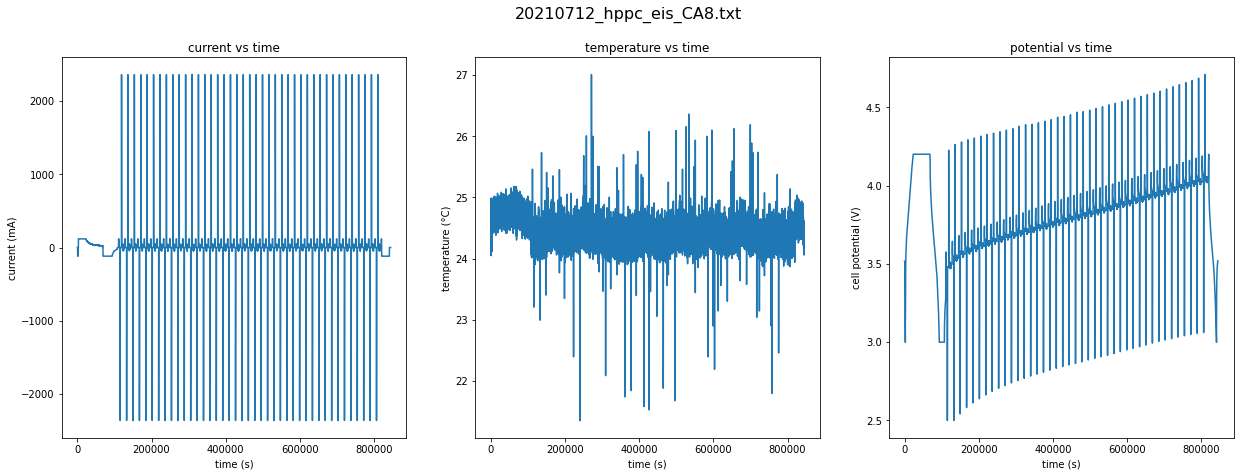

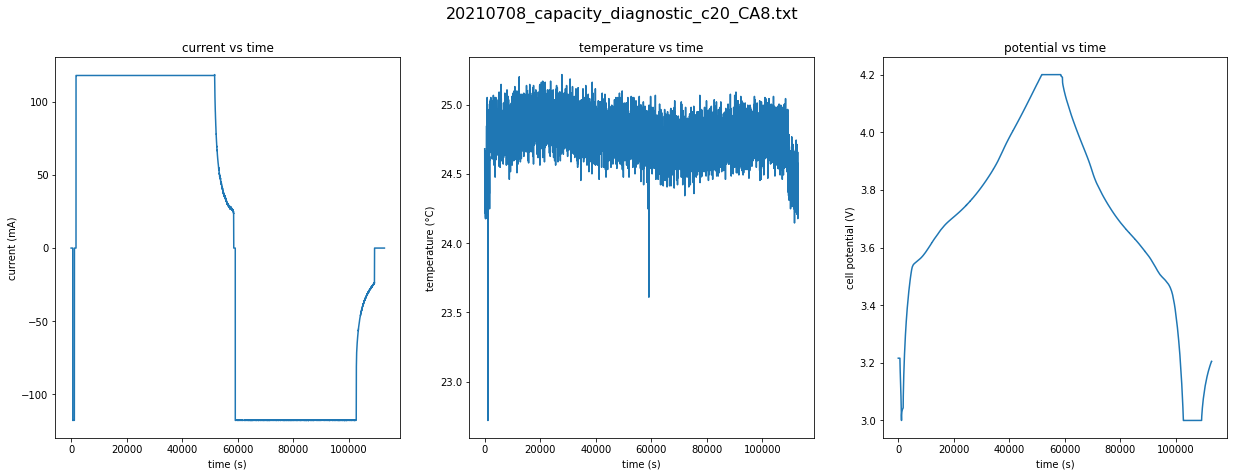

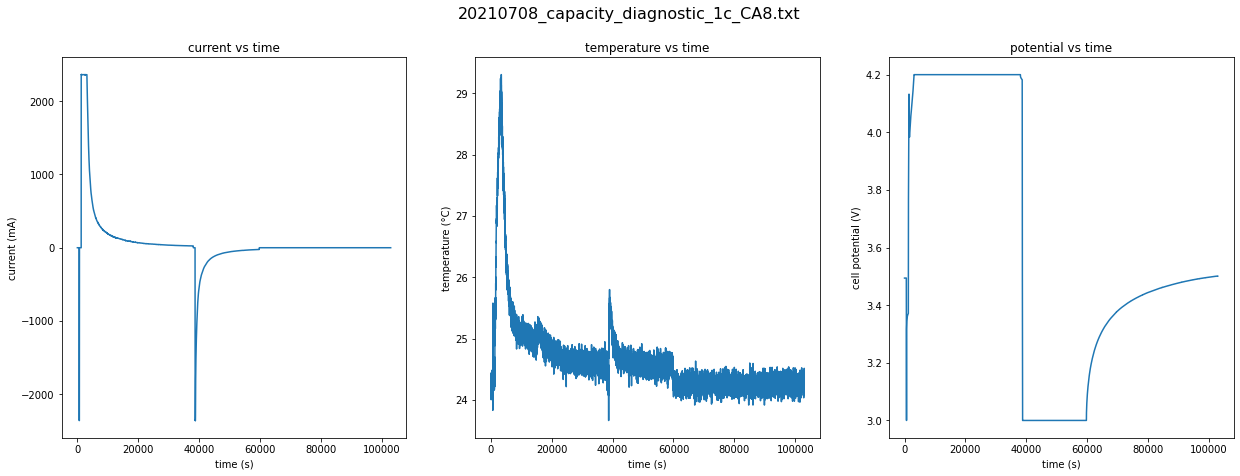

In [15]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
# make bigger
matplotlib.rcParams['figure.figsize'] = [21, 7]

counter = 0 # counter for differentiating plots

for test in test_data:
    # column names: ["time/s", "I/mA", "Temperature/°C", "Ecell/V"]
    fig = plt.figure(counter)

    # current
    plt.subplot(1, 3, 1)
    plt.plot(test["df"]["time/s"], test["df"]["I/mA"])
    plt.ylabel('current (mA)')
    plt.xlabel('time (s)')
    plt.title('current vs time')

    # temp
    plt.subplot(1, 3, 2)
    plt.plot(test["df"]["time/s"], test["df"]["Temperature/°C"])
    plt.ylabel('temperature (°C)')
    plt.xlabel('time (s)')
    plt.title('temperature vs time')

    # potential
    plt.subplot(1, 3, 3)
    plt.plot(test["df"]["time/s"], test["df"]["Ecell/V"])
    plt.ylabel('cell potential (V)')
    plt.xlabel('time (s)')
    plt.title('potential vs time')

    # title
    fig.suptitle(test["name"], fontsize=16)

    counter += 1

sample plotting capacity vs time

Index(['mode', 'ox/red', 'error', 'control changes', 'Ns changes',
       'counter inc.', 'Ns', 'I Range', 'time/s', 'control/V/mA', 'Ecell/V',
       'I/mA', 'dq/mA.h', '(Q-Qo)/mA.h', 'Energy/W.h', 'Temperature/°C',
       'Energy charge/W.h', 'Energy discharge/W.h', 'Capacitance charge/µF',
       'Capacitance discharge/µF', 'x', 'Q discharge/mA.h', 'Q charge/mA.h',
       'Capacity/mA.h', 'Efficiency/%', 'control/V', 'control/mA',
       'cycle number', 'P/W', 'R/Ohm', 'Unnamed: 30'],
      dtype='object')
2795.788526451134


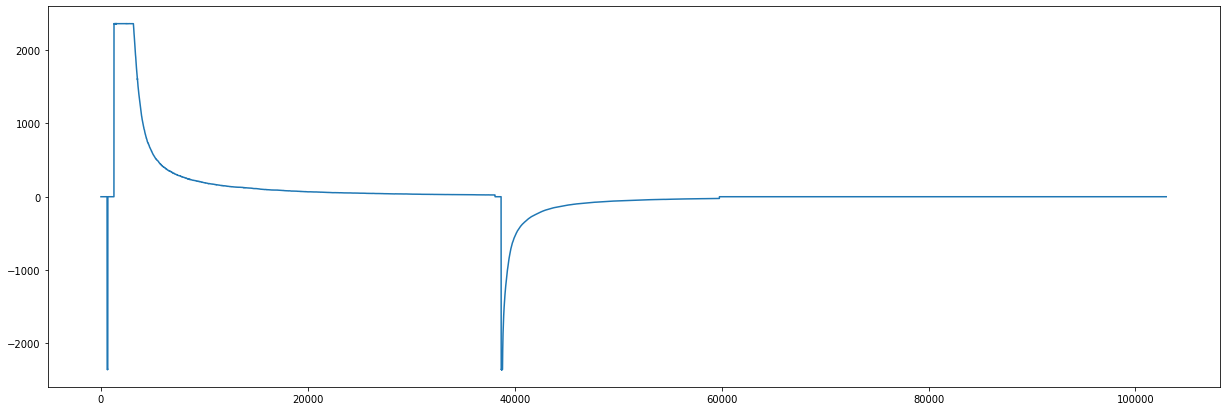

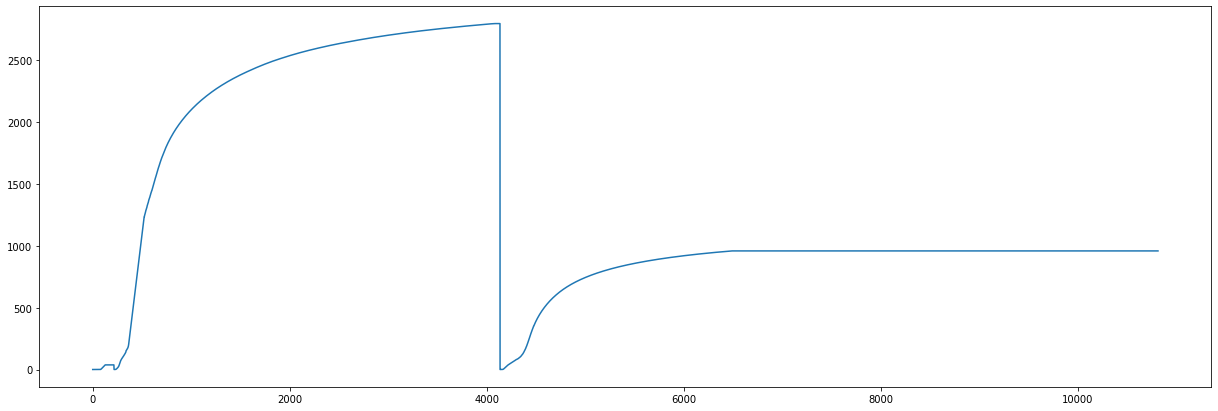

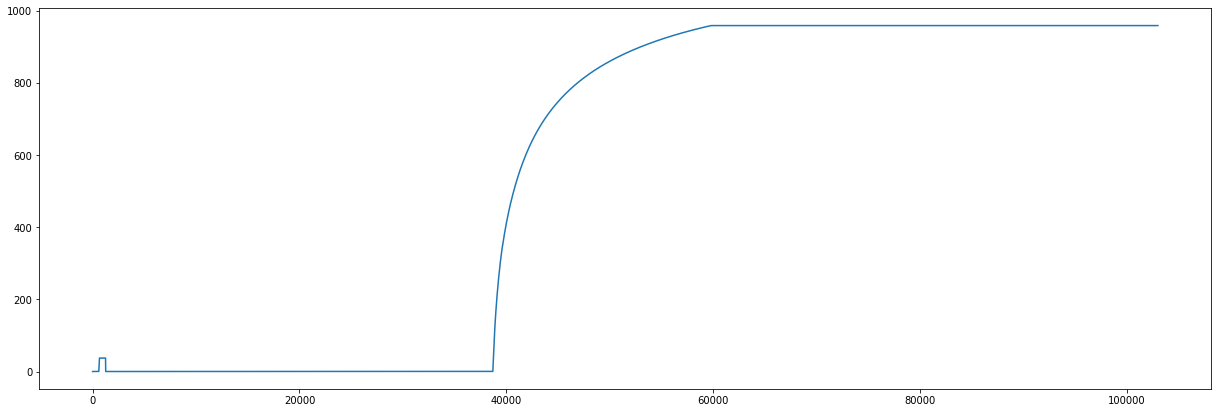

In [16]:
sample_test = test_data[6] # a c20 trial

print(test["df"].columns)

print(max(test["df"]["Capacity/mA.h"]))
plt.figure(1)
plt.plot(test["df"]["time/s"], test["df"]["I/mA"])
plt.figure(2)
plt.plot(test["df"]["Capacity/mA.h"])
plt.figure(3)
plt.plot(test["df"]["time/s"], test["df"]["Q discharge/mA.h"])

10/26/21

Next steps:
- state of health of cells
- present as case study of fast formation

parsing voltage monitoring files (TO BE COMPLETED)

In [17]:
# exclude voltage_monitoring, and include only .mpt files
regex_vm = re.compile("(?=.*voltage_monitoring)(?=.*mpt).*$") # add hppc.txt tests
volt_monitor = [file for file in os.listdir() if regex_vm.match(file)]

for file in volt_monitor:
    with open(file, 'rb') as f:
        lines = f.readlines()
        test_entry = dict(channel="", name="", date="", headerlines=0, df=pd.DataFrame())
        # test_entry["channel"] = lines[5].decode('ASCII')[17:-12]
        # test_entry["name"] = file
        # test_entry["date"] = lines[14].decode('ASCII')[25:-2]
        # test_entry["headerlines"] = int(lines[1].decode('ASCII').split()[-1])
        
        test_data.append(test_entry)

> all functions/code in this file has been migrated to a class called `EndOfLifeCells` in `src/eol.py`